c:\Users\M__zzZ\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


-------第0轮训练开始-------
训练次数：1，loss:45.820404052734375
训练次数：2，loss:21.026430130004883
训练次数：3，loss:25.423967361450195
训练次数：4，loss:27.99445152282715
训练次数：5，loss:21.837078094482422
训练次数：6，loss:22.558412551879883
训练次数：7，loss:20.57183074951172
训练次数：8，loss:16.6502628326416
训练次数：9，loss:13.837445259094238
训练次数：10，loss:19.551700592041016
训练次数：11，loss:16.3084659576416
训练次数：12，loss:15.417899131774902
训练次数：13，loss:16.724451065063477
训练次数：14，loss:15.173872947692871
训练次数：15，loss:14.8076171875
训练次数：16，loss:16.474546432495117
训练次数：17，loss:15.429442405700684
训练次数：18，loss:14.96109676361084
训练次数：19，loss:15.188887596130371
训练次数：20，loss:16.380704879760742
训练次数：21，loss:15.16196060180664
训练次数：22，loss:15.308477401733398
训练次数：23，loss:14.730731964111328
训练次数：24，loss:15.38305377960205
训练次数：25，loss:15.974997520446777
训练次数：26，loss:14.627901077270508
训练次数：27，loss:14.217353820800781
训练次数：28，loss:16.61829948425293
训练次数：29，loss:7.015536308288574
tensor([[0.5623],
        [0.5819],
        [0.5851],
        [0.5783],
   

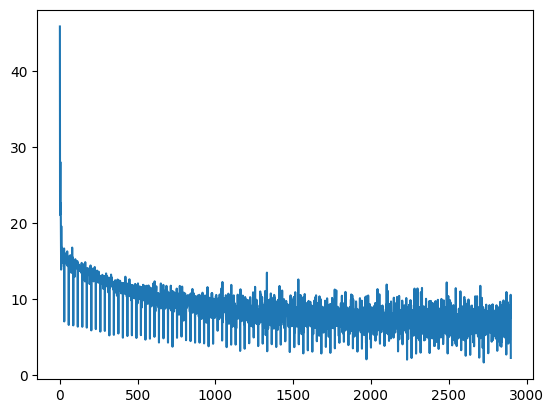

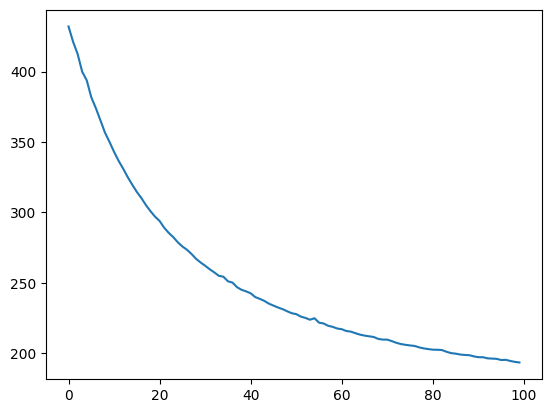

precision: 0.8519859402460457
recall: 0.7585377358490566


In [1]:
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from LinearRegress_model import *
from Dataset import *
import matplotlib.pyplot as plt

# 加载训练数据
myTrainData = MyDataSet("origin_breast_cancer_data.csv")
# 将batch_size设置成50，表示每一次迭代取出50个数据。
TrainLoader = DataLoader(dataset=myTrainData, batch_size=20, shuffle=True)
# 加载测试数据
myTestData = MyDataSet("origin_breast_cancer_data.csv")
ValidationLoader = DataLoader(dataset=myTestData, batch_size=20, shuffle=True)
# 创建网络模型
myModel = LinearRegress(inputsize=1, outputsize=1)
# 损失函数
loss_fn = nn.BCELoss(size_average=False)
# 学习率
learning_rate = 1e-3

# 优化器
optimizer = torch.optim.SGD(myModel.parameters(), lr=learning_rate)
# 总共的训练步数
total_train_step = 0
# 总共的测试步数
total_test_step = 0
step = 0
epoch = 100
# Tensorboard的writer实例，用于记录训练过程中的LOSS变化
writer = SummaryWriter("logs")
train_loss_his = []
test_totalloss_his = []

predictions = 0
TPs = 0
numOfPositiveLabel = 0
# 判断预测是否成功的超参
a = 0.5
for i in range(epoch):
    print(f"-------第{i}轮训练开始-------")
    # 这一部分是模型训练
    for data1 in TrainLoader:
        # 注意这里是取了一个batchsize的数据，该例batchsize=50，因此取了50个数据
        x1,y1 = data1
        # 把输入扔给模型，得到预测输出output
        output1 = myModel(x1)
        # 计算预测输出output和真是输出y之间的LOSS
        loss = loss_fn(output1, y1)
        # 将梯度清零，好像这一步必须要
        optimizer.zero_grad()
        # 反向传播，计算梯度
        loss.backward()
        # 优化一次参数
        optimizer.step()
        # 总的迭代次数加1
        total_train_step = total_train_step + 1
        # 将当前的LOSS放到LOSS记录的list中
        train_loss_his.append(loss.detach().numpy())
        # 将当前的LOSS记录到tensorboard的中
        writer.add_scalar("train_loss", loss.item(), total_train_step)
        print(f"训练次数：{total_train_step}，loss:{loss}")
        
    # 下面这段代码是模型测试
    total_test_loss = 0
    # 这里告诉代码不用求梯度了
    with torch.no_grad():
        for data2 in ValidationLoader:
            x2, y2 = data2
            output2 = myModel(x2)
            loss = loss_fn(output2, y2)
            print(output2)
            for tmp in range(len(output2)):
                total_test_step = total_test_step + 1
                if(y2[tmp] == 1):
                    numOfPositiveLabel = numOfPositiveLabel + 1

                if(output2[tmp]>= a):
                    if(y2[tmp] == 1):
                        predictions = predictions + 1
                        TPs = TPs + 1
                else:
                    if(y2[tmp] == 0):
                        predictions = predictions + 1
            
            # 这里求一个epoch的总loss
            total_test_loss = total_test_loss + loss
        
        print(f"测试集上的loss：{total_test_loss}")
        test_totalloss_his.append(total_test_loss.detach().numpy())
        writer.add_scalar("test_loss", total_test_loss.item(), i)
# 输出线性模型的两个参数，分别是权重和偏置
for parameters in myModel.parameters():
    print(parameters)
writer.close()
# 画出训练损失变化曲线
plt.plot(train_loss_his)
plt.show()
# 画出测试损失变化曲线
plt.plot(test_totalloss_his)
plt.show()
#计算精确度
precision = predictions/total_test_step
print(f"precision: {precision}")
#计算召回率
recall = TPs/numOfPositiveLabel
print(f"recall: {recall}")
#计算F1得分
print(f"F1Score：{2 * (recall*precision)/(recall+precision)}")